In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from util.plotting import *
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from src.sampling.Sampling import sampling_sndl

## Erdos-Renyi
### Load ER

In [2]:
def ER(ntwk, save_path='data/ER_{ntwk}.txt'):
    save_path = save_path.format(ntwk=ntwk)
    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    n = len(G.nodes())
    p = nx.density(G)

    G_er = nx.erdos_renyi_graph(n=n,p=p)
    nx.write_edgelist(G_er, save_path, data=False)

In [3]:
# Example Usage
ER('Caltech36')
ER('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 157, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 157
num of subgraphs induced on k-paths: 7
initial loading beta [[ 0.81153159  0.14828645 -0.32329832 -0.96895785  0.01574497 -0.53438792
   0.45476241 -0.73015861 -0.93603053 -0.37619942 -0.0269689  -0.08738191
  -0.73853146  0.23188805 -0.12058007 -0.85215645 -0.83118553]
 [ 0.13050037 -0.10904735  0.33258623  0.61635867 -0.19665436 -0.09166207
   0.59326571 -0.34280763 -0.7928027   0.9876474  -0.83649412 -0.61786496
  -0.98096338  0.57540086 -0.08624507 -0.50896867 -0.4466175 ]]


100%|██████████| 100/100 [00:00<00:00, 153.58it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[334,  30],
       [ 14, 150]]), 0.917]


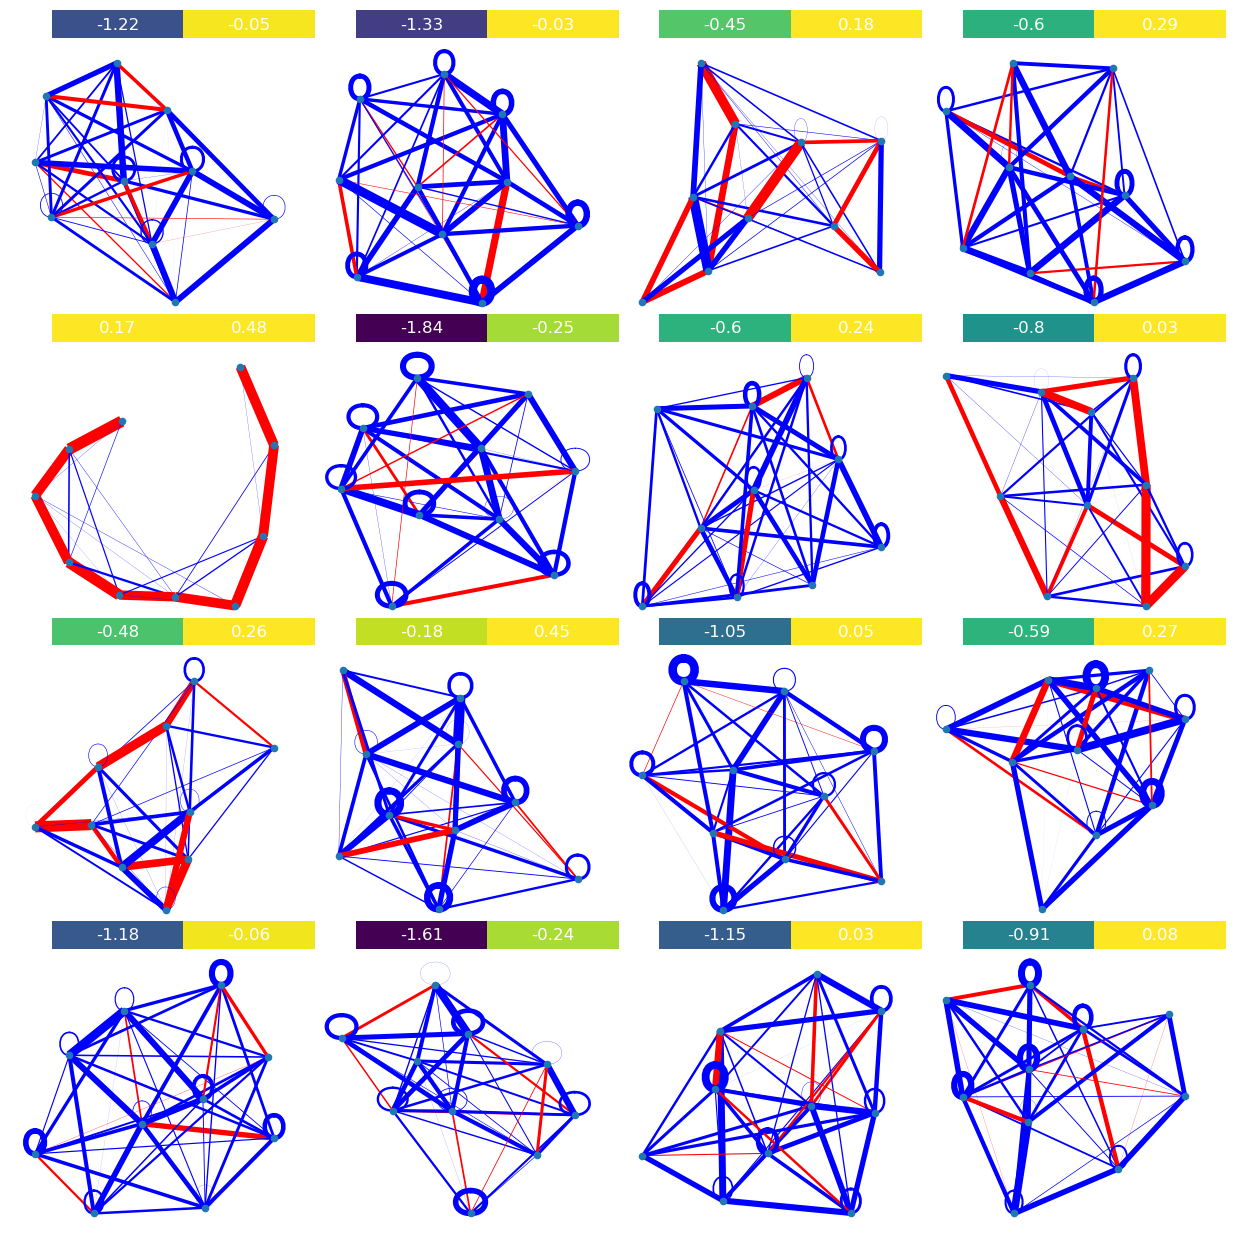

In [4]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'ER_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter=100, subsample_number=100,
                            if_validate=False, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_ER^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

### Load WS

In [5]:
def WS(ntwk, p=0.1, random_orientation=False, save_path='data/WS_{ntwk}.txt'):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    save_path = save_path.format(ntwk=ntwk)

    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G_ws = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G_ws.add_edge(e[0],v)
        else: 
            G_ws.add_edge(e[0],e[1])

    nx.write_edgelist(G_ws, save_path, data=False)

In [6]:
# Example Usage
WS('Caltech36')
WS('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 144, 8]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 144
num of subgraphs induced on k-paths: 8
initial loading beta [[ 0.20426073  0.72625608  0.4141688   0.60280258  0.20899771  0.20442944
   0.5744114  -0.28425463 -0.87171495 -0.31023153  0.84322002  0.06213573
  -0.61826772  0.16574733 -0.06234733  0.71331629  0.99454832]
 [-0.12661401  0.11597583 -0.15803048 -0.08957324  0.01443961  0.95807235
  -0.07042149  0.50913404 -0.73268034  0.84151972 -0.55573935 -0.36697211
  -0.10514433  0.64661403  0.31733823  0.58939386 -0.38706473]]


 19%|█▉        | 19/100 [00:00<00:00, 182.88it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[317,  35],
       [ 20, 132]]), 0.891]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[317,  35],
       [ 20, 132]]), 0.891]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[315,  37],
       [ 20, 132]]), 0.887]


 38%|███▊      | 38/100 [00:00<00:00, 163.06it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[315,  37],
       [ 20, 132]]), 0.887]


 55%|█████▌    | 55/100 [00:00<00:00, 154.43it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[315,  37],
       [ 20, 132]]), 0.887]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[315,  37],
       [ 19, 133]]), 0.889]


 71%|███████   | 71/100 [00:00<00:00, 152.10it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[315,  37],
       [ 19, 133]]), 0.889]
!!! pred_type filter


100%|██████████| 100/100 [00:00<00:00, 154.14it/s]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[314,  38],
       [ 19, 133]]), 0.887]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[314,  38],
       [ 19, 133]]), 0.887]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[314,  38],
       [ 19, 133]]), 0.887]


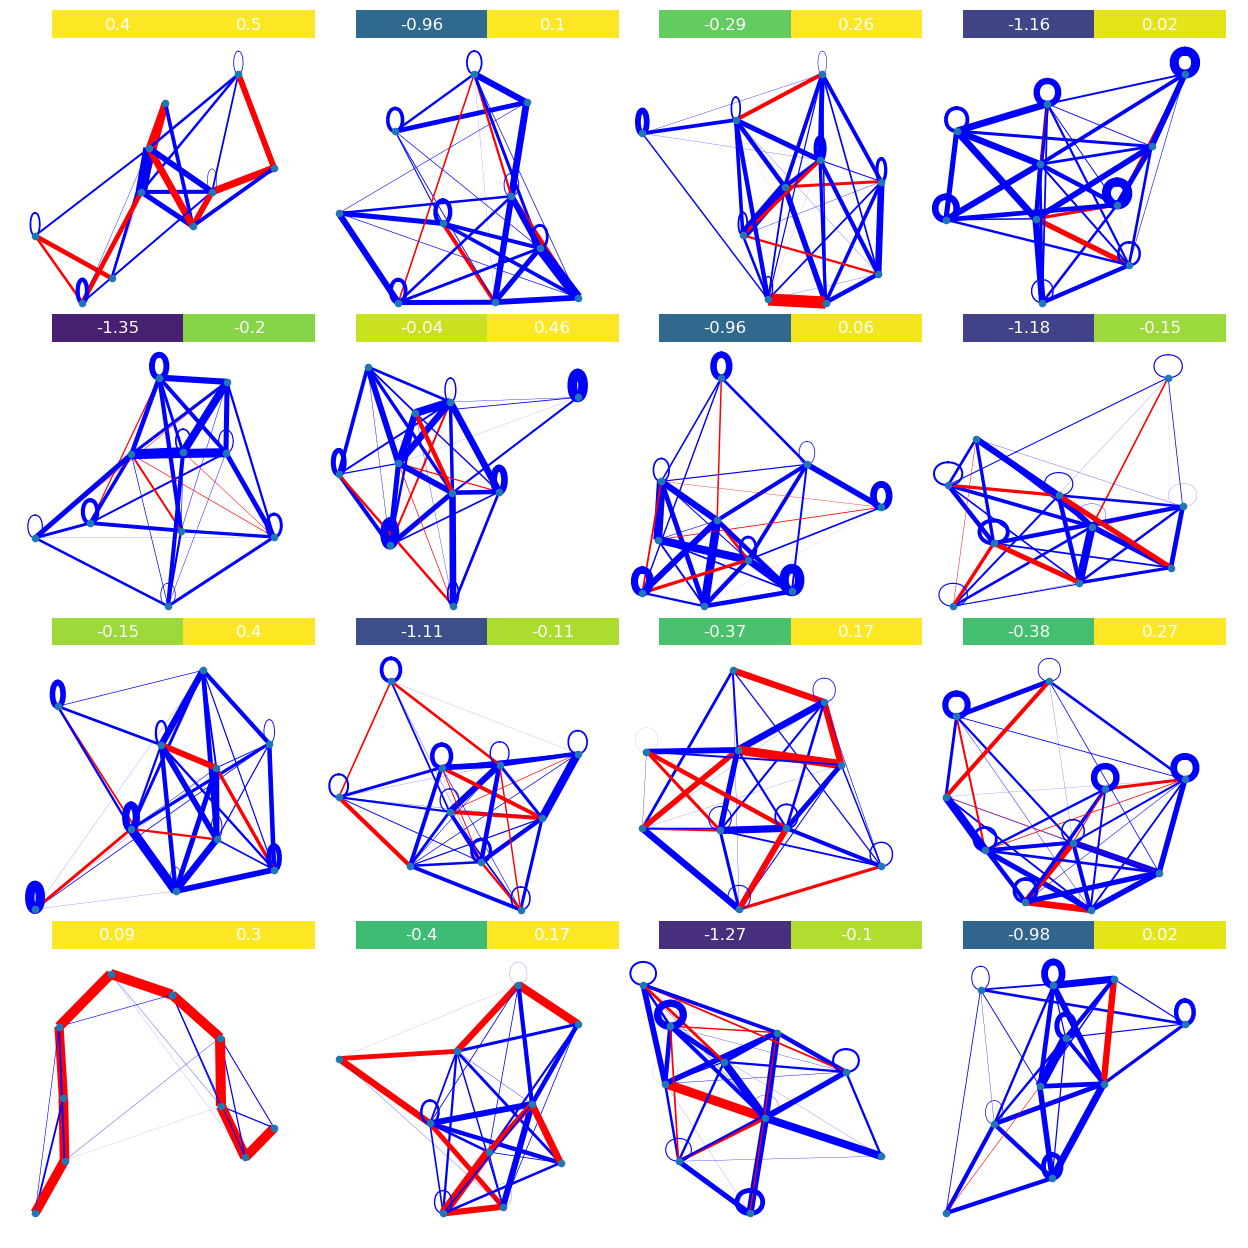

In [7]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'WS_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_WS^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Barabasi-Albert (preferential attachment)

### Load BA

In [8]:
def BA(ntwk, m0=1, m=1, n=100, alpha=1, save_path='data/BA_{ntwk}.txt'):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    if G0 is not None: 
        G_ba = G0
    else: 
        G_ba = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G_ba.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G_ba.degree(n)**(alpha) for n in G_ba.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G_ba.nodes(), p=deg_dist)
            G_ba.add_edge(s,v)

    nx.write_edgelist(G_ba, save_path, data=False)

In [9]:
# Example Usage
BA('Caltech36')
BA('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 148, 8]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 148
num of subgraphs induced on k-paths: 8
initial loading beta [[ 0.69465458  0.47905821 -0.0309521   0.02917595  0.88890512  0.94121654
   0.13054413 -0.94604663  0.39211237 -0.01513218  0.44269247 -0.48781216
   0.45980807 -0.22617939  0.0670227   0.68318648  0.39536054]
 [-0.02330324 -0.25211917  0.33398861 -0.21173463  0.29908195  0.69939295
  -0.61454528  0.15702721  0.06401655 -0.61247768 -0.2490165  -0.85205697
   0.99546878 -0.5940598   0.89027796 -0.39746023 -0.02308756]]


 18%|█▊        | 18/100 [00:00<00:00, 173.51it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[333,  23],
       [ 12, 144]]), 0.932]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[333,  23],
       [ 12, 144]]), 0.932]


 36%|███▌      | 36/100 [00:00<00:00, 163.17it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[333,  23],
       [ 12, 144]]), 0.932]


 69%|██████▉   | 69/100 [00:00<00:00, 150.67it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 12, 144]]), 0.93]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]


100%|██████████| 100/100 [00:00<00:00, 153.27it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]
!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[332,  24],
       [ 11, 145]]), 0.932]


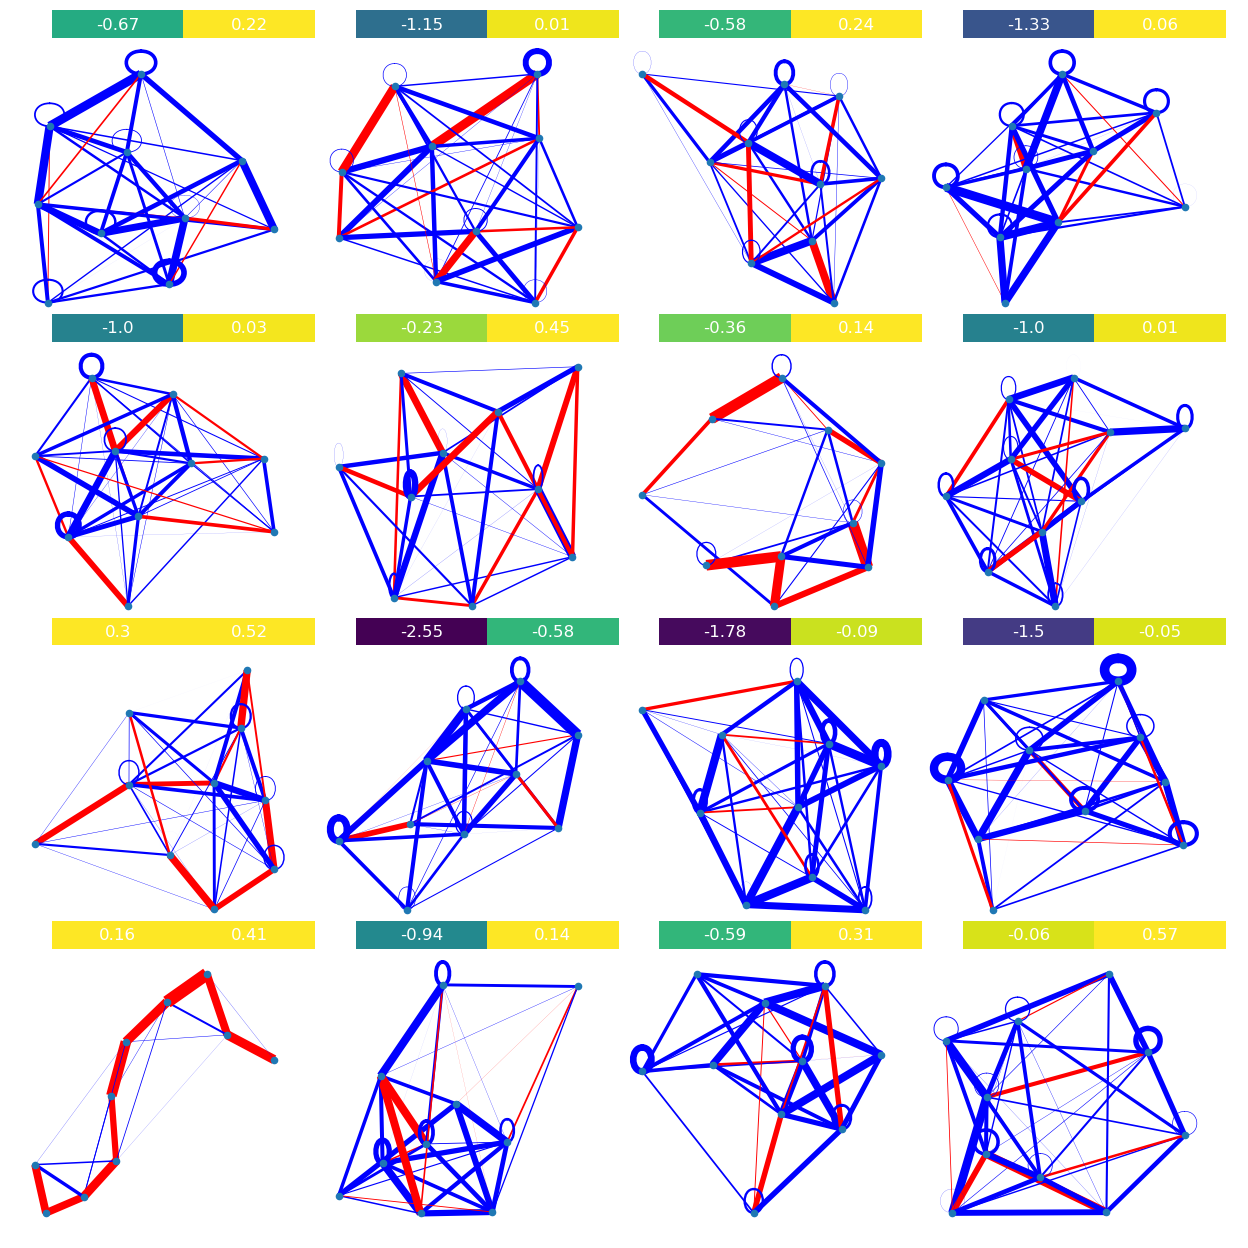

In [10]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'BA_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_BA^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Confinguration model

### Load CM

In [11]:
def CM(ntwk, save_path='data/CM_{ntwk}.txt'):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    degrees = [G0.degree(v) for v in G0.nodes()]

    d = list(degrees)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])

    G_cm = nx.MultiGraph()
    while len(stubs_list)>0:
        ss = np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1 = ss[0]
        s2 = ss[1]
        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G_cm.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
                    
    nx.write_edgelist(G_cm, save_path, data=False)

In [12]:
# Example Usage
CM('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 149, 8]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 149
num of subgraphs induced on k-paths: 8
initial loading beta [[-0.41950408 -0.36928452 -0.81203137  0.63564445  0.08490708 -0.7013542
   0.2176836  -0.45179736  0.19031253 -0.62330141  0.87465556 -0.22146931
   0.77590183  0.39217162 -0.24962048 -0.25407307  0.89588726]
 [-0.83083294 -0.08657424 -0.88183627 -0.77368627 -0.1197669  -0.23265563
   0.61325357  0.10795161 -0.80757024 -0.10519875 -0.65402399  0.14367362
  -0.99051011 -0.22395639  0.70655863  0.31783067 -0.65461993]]


 16%|█▌        | 16/100 [00:00<00:00, 158.30it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 11, 146]]), 0.924]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  27],
       [ 10, 147]]), 0.928]


 32%|███▏      | 32/100 [00:00<00:00, 147.68it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  27],
       [ 10, 147]]), 0.928]


 47%|████▋     | 47/100 [00:00<00:00, 142.54it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]


 62%|██████▏   | 62/100 [00:00<00:00, 140.44it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]


 77%|███████▋  | 77/100 [00:00<00:00, 138.29it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  27],
       [ 10, 147]]), 0.928]


 91%|█████████ | 91/100 [00:00<00:00, 138.47it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]


100%|██████████| 100/100 [00:00<00:00, 140.98it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[329,  28],
       [ 10, 147]]), 0.926]


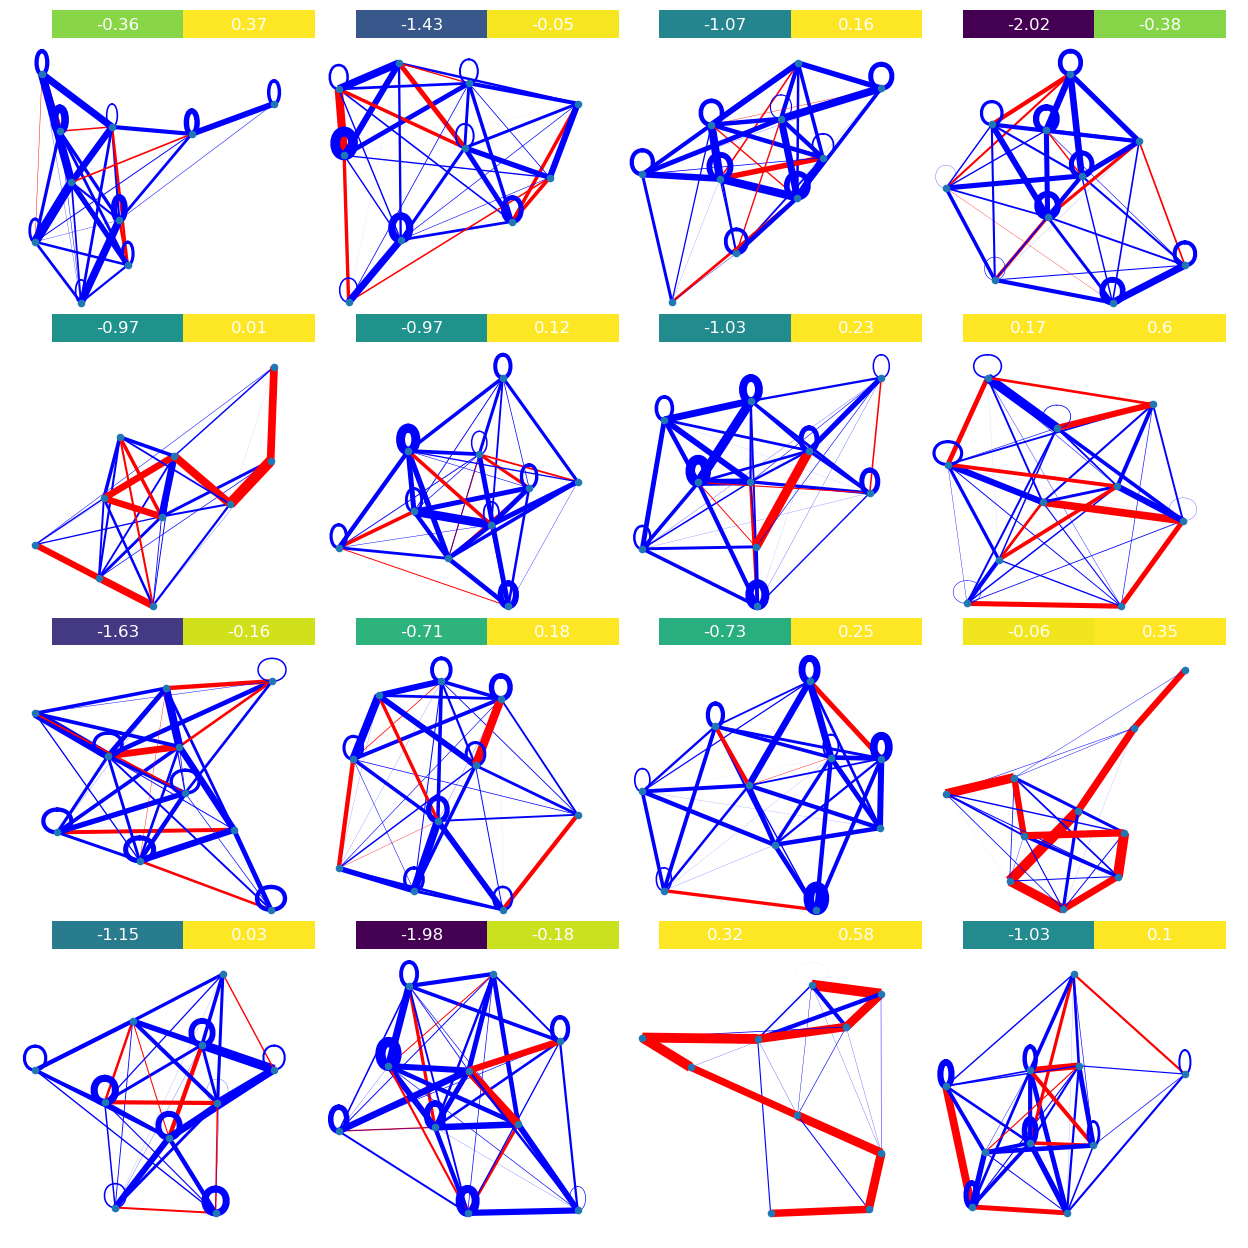

In [13]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'CM_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_CM^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)